# Analyzing wildfire activities in Australia

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [3]:
import requests

def download(url, filename):
    response= requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb")as f:
            f.write(response.content)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
filename ="aus_data"
download(url, filename)

In [4]:
df = pd.read_csv(filename)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

# Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [11]:
import datetime as dt
# Convert 'Date' column to datetime type
df["Date"] = pd.to_datetime(df["Date"])

# Extract 'Year' and 'Month' from 'Date' column
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Check dtypes after conversion
print(df.dtypes)

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
Year                                            int32
Month                                           int32
dtype: object


# Let's try to understand the change in average estimated fire area over time
(use pandas to plot)

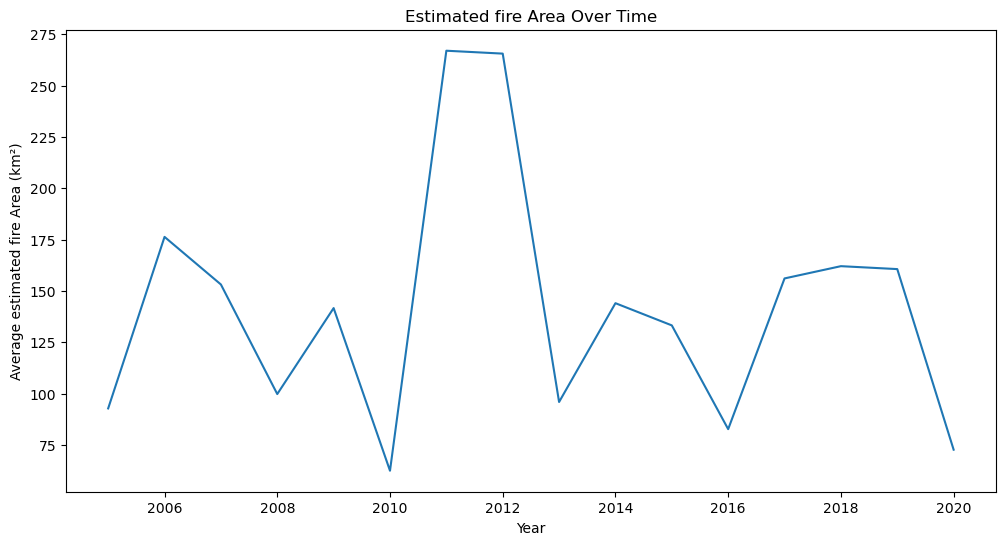

In [14]:
plt.figure(figsize=(12,6))
# Group by 'Year' and 'Month' and calculate mean of 'Estimated_fire_area'
df_new = df.groupby(['Year'])['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel("Year")
plt.ylabel("Average estimated fire Area (km²)")
plt.title("Estimated fire Area Over Time")
plt.show()


# You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

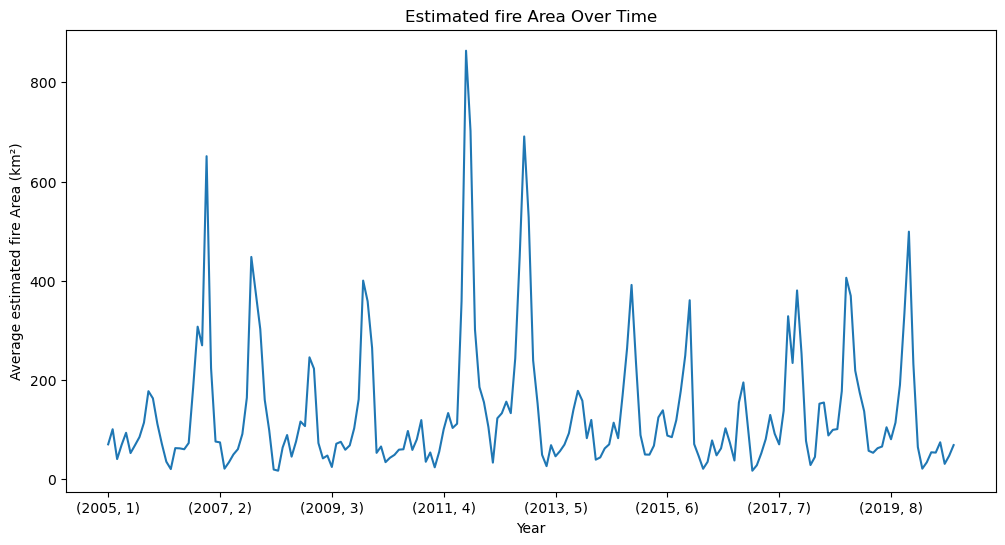

In [15]:
plt.figure(figsize=(12,6))
# Group by 'Year' and 'Month' and calculate mean of 'Estimated_fire_area'
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel("Year")
plt.ylabel("Average estimated fire Area (km²)")
plt.title("Estimated fire Area Over Time")
plt.show()


This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


# Let's have an insight on the distribution of mean estimated fire brightness across the regions
use the functionality of seaborn to develop a barplot

# before starting with the plot, why not know the regions mentioned in the dataset?.
# Make use of unique() to identify the regions in the dataset (apply it on series only)

In [16]:
df["Region"].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

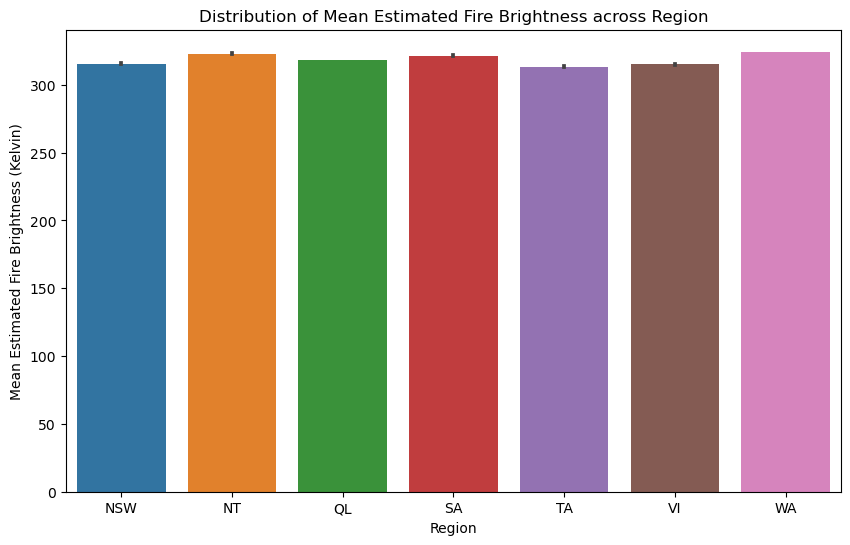

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Region", y="Mean_estimated_fire_brightness")
plt.xlabel("Region")
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title("Distribution of Mean Estimated Fire Brightness across Region")
plt.show()

### TASK Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


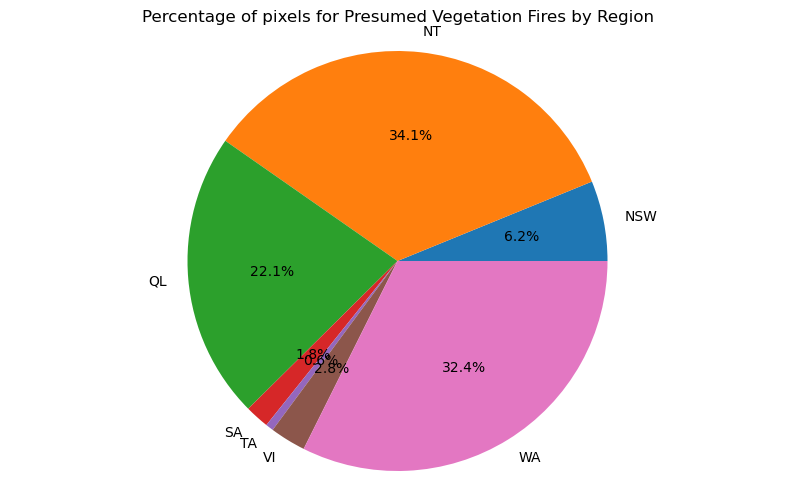

In [19]:
plt.figure(figsize=(10, 6))
region_counts = df.groupby("Region")["Count"].sum()
plt.pie(region_counts, labels=region_counts.index, autopct = '%1.1f%%')
plt.title("Percentage of pixels for Presumed Vegetation Fires by Region")
plt.axis("equal")
plt.show()

### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

# remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


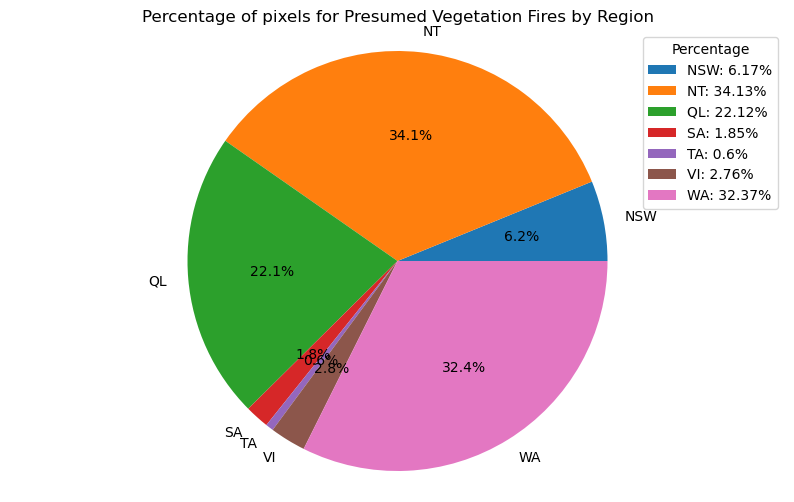

In [21]:
# Calculate total counts for each region
region_counts = df.groupby("Region")["Count"].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title("Percentage of pixels for Presumed Vegetation Fires by Region")
plt.axis("equal")

# Add percentage labels manually using plt.legend()
percentage_labels = ["{}: {}%".format(i, round(k / region_counts.sum() * 100, 2)) for i, k in zip(region_counts.index, region_counts)]
plt.legend(labels=percentage_labels, title='Percentage', loc="upper right")
plt.show()

### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


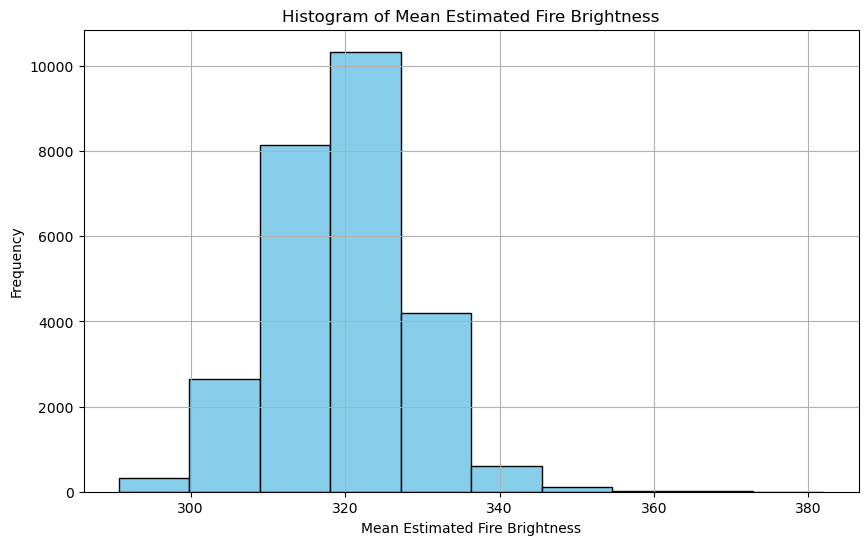

In [25]:
# Extract 'Mean_estimated_fire_brightness' column
brightness_values = df['Mean_estimated_fire_brightness']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(brightness_values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

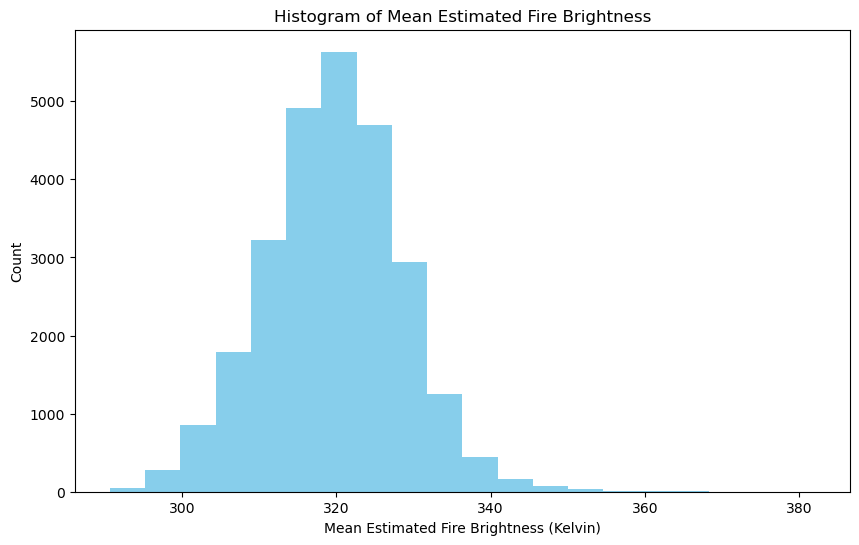

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20, color='skyblue')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


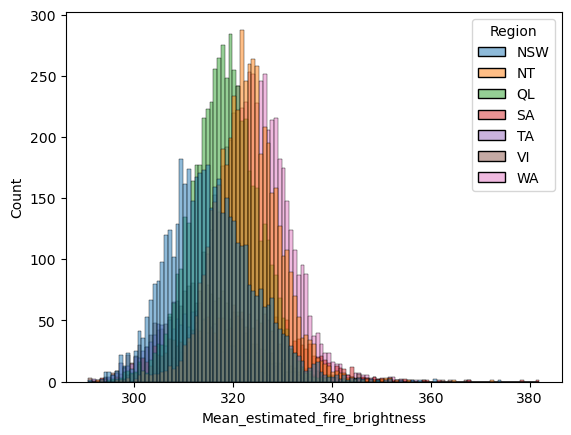

In [30]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


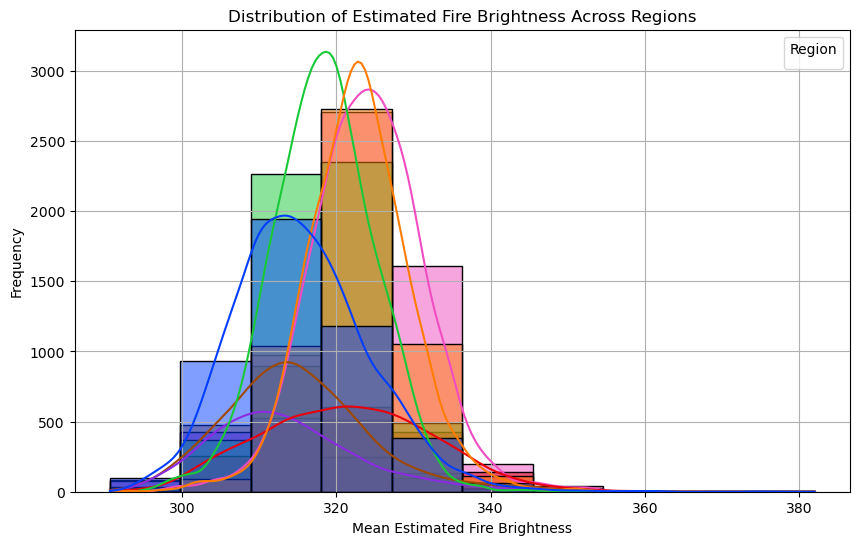

In [31]:
# Plot histogram with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', bins=10, kde=True, palette='bright')
plt.title('Distribution of Estimated Fire Brightness Across Regions')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Frequency')
plt.legend(title='Region')
plt.grid(True)
plt.show()

### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


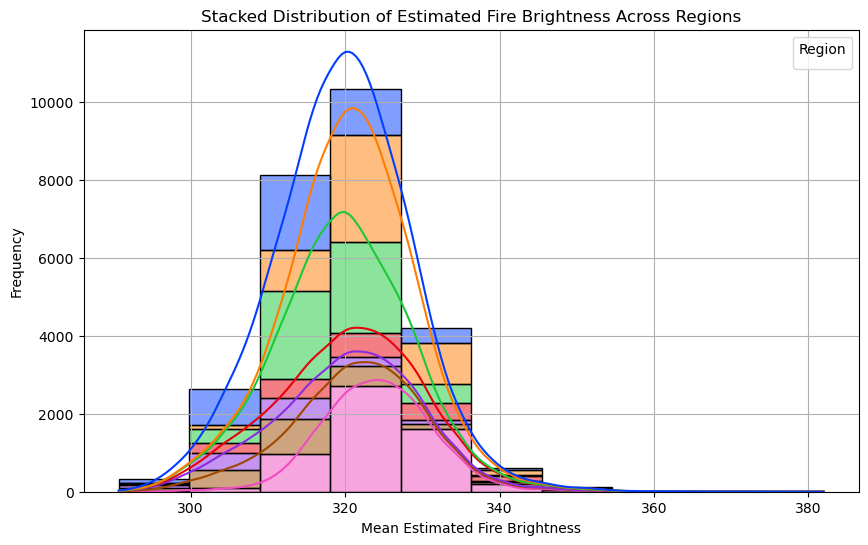

In [32]:
# Plot histogram with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', bins=10, kde=True, palette='bright', multiple='stack')
plt.title('Stacked Distribution of Estimated Fire Brightness Across Regions')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Frequency')
plt.legend(title='Region')
plt.grid(True)
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


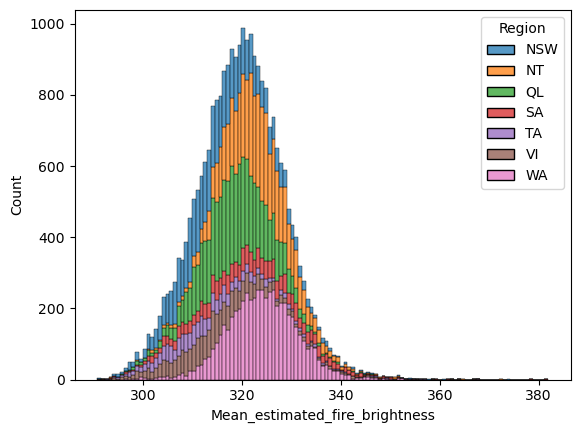

In [33]:
# or
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


In [34]:
# Calculate correlation
correlation = df['Mean_estimated_fire_radiative_power'].corr(df['Mean_confidence'])

print("Correlation between mean estimated fire radiative power and mean confidence level:", correlation)

Correlation between mean estimated fire radiative power and mean confidence level: 0.4523218915986432


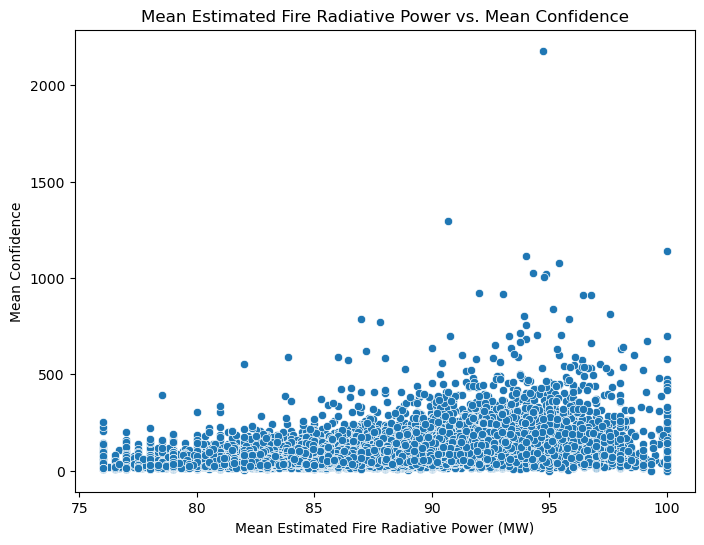

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [36]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [37]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)